In [ ]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import itertools
import math

from google.colab import drive
from pathlib import Path

In [ ]:
import networkx as nx 
import numpy as np 
import pandas as pd 
import re 
import ast 
import operator;
from plotly.offline import iplot, plot

In [ ]:
drive.mount('/content/drive')
base = Path('/content/drive/My Drive/')
sys.path.append(str(base))

Mounted at /content/drive


In [ ]:
datasetURL = base/'Chevalier/Perkuliahan/SNA/GFG.csv'
dataset = pd.read_csv(datasetURL)

dataset = dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')]
dataset.head()

,ids,texts,user_ids,user_screen_name,sources,retweeteds,retweet_counts,is_quote_statuses,in_reply_to_user_ids,in_reply_to_screen_names,favoriteds,favorite_counts,user_mentionses,created_ats
0,1370250256760283137,@winantisri11 @_dwi21_ @Corona_KafirNw Wahh pa...,710674309,abdunnaja,Twitter for Android,False,0,False,1.354664e+18,winantisri11,False,0,"[{'screen_name': 'winantisri11', 'name': '@win...",2021-03-12 05:48:13
1,1370250126699159552,"Alhamdulillah sudah vaksin Covid-19 ke 2, semo...",241765303,habib_ramaDIA,Instagram,False,0,False,NaN,NaN,False,0,[],2021-03-12 05:47:42
2,1370250071883747331,RT @KemenkesRI: Untuk mendukung seniman &amp; ...,1855857877,manganegara,Twitter Web App,False,12,False,NaN,NaN,False,0,"[{'screen_name': 'KemenkesRI', 'name': 'Kemenk...",2021-03-12 05:47:29
3,1370250057111330817,"RT @KemenkesRI: Pada tahap kedua ini, Pemda Pr...",1855857877,manganegara,Twitter Web App,False,6,False,NaN,NaN,False,0,"[{'screen_name': 'KemenkesRI', 'name': 'Kemenk...",2021-03-12 05:47:26
4,1370249773979115523,@Corona_KafirNw @EmmanuelMacron Are you.l sure...,3104611357,NikenSH19_,Twitter for iPhone,False,0,False,1.311574e+18,Corona_KafirNw,False,0,"[{'screen_name': 'Corona_KafirNw', 'name': 'So...",2021-03-12 05:46:18


In [ ]:
# Check All Column
print(dataset.columns)

# Check Type All Column
print(dataset.dtypes)

Index(['ids', 'texts', 'user_ids', 'user_screen_name', 'sources', 'retweeteds',
       'retweet_counts', 'is_quote_statuses', 'in_reply_to_user_ids',
       'in_reply_to_screen_names', 'favoriteds', 'favorite_counts',
       'user_mentionses', 'created_ats'],
      dtype='object')
ids                           int64
texts                        object
user_ids                      int64
user_screen_name             object
sources                      object
retweeteds                     bool
retweet_counts                int64
is_quote_statuses              bool
in_reply_to_user_ids        float64
in_reply_to_screen_names     object
favoriteds                     bool
favorite_counts               int64
user_mentionses              object
created_ats                  object
dtype: object


In [ ]:
dataset["user_mentionses"][0]

"[{'screen_name': 'winantisri11', 'name': '@winantisri1', 'id': 1354664164644425728, 'id_str': '1354664164644425728', 'indices': [0, 13]}, {'screen_name': '_dwi21_', 'name': '🤜💥RADICALISM💥🤛🔰BRØKÊÑ WÏÑG🔰', 'id': 1246765161433595904, 'id_str': '1246765161433595904', 'indices': [14, 22]}, {'screen_name': 'Corona_KafirNw', 'name': 'Sora TaranBala✝️🇮🇩✝️', 'id': 1311573979103076352, 'id_str': '1311573979103076352', 'indices': [23, 38]}, {'screen_name': 'kaesangp', 'name': 'Kaesang Pangarep', 'id': 131476314, 'id_str': '131476314', 'indices': [71, 80]}]"

In [ ]:
def getUserInteractions(row):
  """
  Get the interactions between different users.
  """
  # From every row of the original DataFrame.
  # First we obtain the "user_id" and "screen_name".
  user = row["user_ids"], row["user_screen_name"]
  # Be careful if there is no user id.
  if user[0] is None:
    return (None, None), []
  # The interactions are going to be a set of tuples.
  interactions = set()

  # Add all interactions. 
  # First, we add the interactions corresponding to replies adding 
  # the id and screen_name.
  interactions.add((row["in_reply_to_user_ids"], 
  row["in_reply_to_screen_names"]))
  # And later, the interactions with user mentions.
  for item in list(eval(row["user_mentionses"])):
    # print(item)
    # temp = list(eval(item))
    interactions.add((item["id"], 
    item["screen_name"]))

  # Discard if user id is in interactions.
  interactions.discard((row["user_ids"], row["user_screen_name"]))
  # Discard all not existing values.
  interactions.discard((None, None))
  # Return user and interactions.
  return user, interactions

In [ ]:
# Plot to Graph
graph = nx.Graph()
for index, item in dataset.iterrows():
  user, interations = getUserInteractions(item)
  user_id, user_name = user
  tweet_id = item["ids"]
  for interaction in interations:
    int_id, int_name = interaction
    graph.add_edge(user_id, int_id, tweet_id=tweet_id)
    graph.nodes[user_id]["name"] = user_name
    graph.nodes[int_id]["name"] = int_name

In [ ]:
degrees = [val for (node, val) in graph.degree()]
print("The maximum degree of the graph is " + str(np.max(degrees))) 
print("The minimum degree of the graph is " + str(np.min(degrees)))
print("There are " + str(graph.number_of_nodes()) + " nodes and " + str(graph.number_of_edges()) + " edges present in the graph")
print("The average degree of the nodes in the graph is " + str(np.mean(degrees))) 

The maximum degree of the graph is 96
The minimum degree of the graph is 1
There are 4012 nodes and 3500 edges present in the graph
The average degree of the nodes in the graph is 1.744765702891326


In [ ]:
if nx.is_connected(graph):
     print("The graph is connected")
else:
    print("The graph is not connected")
print("There are " + str(nx.number_connected_components(graph)) + " connected in the graph.")

The graph is not connected
There are 740 connected in the graph.


## Using Connected Graph

In [ ]:
largestsubgraph = max((graph.subgraph(c) for c in nx.connected_components(graph)), key=len)
print("There are " + str(largestsubgraph.number_of_nodes()) + " nodes and " + str(largestsubgraph.number_of_edges()) + " edges present in the largest component of the graph.")

There are 1146 nodes and 1352 edges present in the largest component of the graph.


In [ ]:
print("The average clustering coefficient is " + str(nx.average_clustering(largestsubgraph)) + " in the largest subgraph")
print("The transitivity of the largest subgraph is " + str(nx.transitivity(largestsubgraph)))
print("The diameter of our graph is " + str(nx.diameter(largestsubgraph)))
print("The average distance between any two nodes is " + str(nx.average_shortest_path_length(largestsubgraph)))

The average clustering coefficient is 0.04270083314452281 in the largest subgraph
The transitivity of the largest subgraph is 0.052007938360961944
The diameter of our graph is 18
The average distance between any two nodes is 8.032750329606682


In [ ]:
graphcentrality = nx.degree_centrality(largestsubgraph)
maxde = max(graphcentrality.items(), key=operator.itemgetter(1))
graphcloseness = nx.closeness_centrality(largestsubgraph)
graphbetweenness = nx.betweenness_centrality(largestsubgraph, normalized=True, endpoints=False)
maxclo = max(graphcloseness.items(), key=operator.itemgetter(1))
maxbet = max(graphbetweenness.items(), key=operator.itemgetter(1))

In [ ]:
print("The node with ID " + str(maxde[0]) + " has a degree centrality of " + str(maxde[1]) + " which is the max of the graph.")
print("The node with ID " + str(maxclo[0]) + " has a closeness centrality of " + str(maxclo[1]) + " which is the max of the graph.")
print("The node with ID " + str(maxbet[0]) + " has a betweenness centrality of " + str(maxbet[1]) + " which is the max of the graph.")

The node with ID 69183155 has a degree centrality of 0.08384279475982533 which is the max of the graph.
The node with ID 161236190 has a closeness centrality of 0.20333866098383946 which is the max of the graph.
The node with ID 161236190 has a betweenness centrality of 0.4847928725130903 which is the max of the graph.


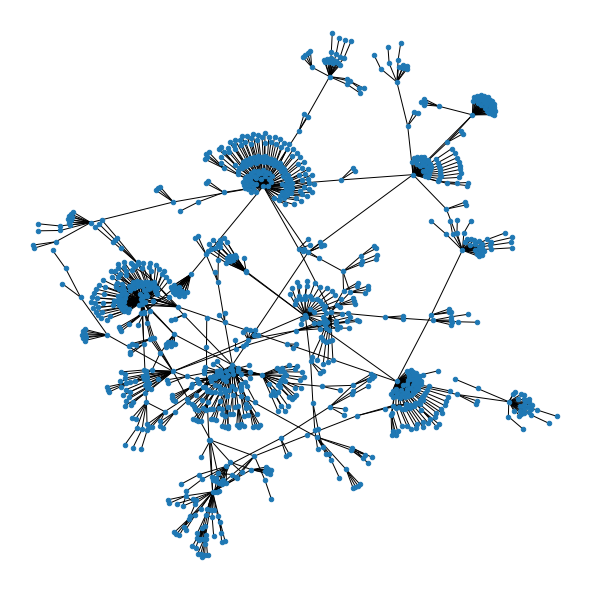

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw(largestsubgraph, with_labels=False, node_size=20)
plt.show()

In [ ]:
fixOrdinatityGraph = sorted(largestsubgraph.degree, key=lambda x: x[1], reverse=True)[:10]
fixOrdinatityGraph

[(69183155, 96),
 (22126902, 68),
 (940486643546386432, 58),
 (109762193, 54),
 (154102750, 39),
 (980097559736721408, 33),
 (161236190, 28),
 (61388496, 28),
 (1311573979103076352, 27),
 (68930552, 26)]

In [ ]:
tempSet = []
tempIndex = []
for i, item in enumerate(dataset["user_ids"], start=0):
  for findID in fixOrdinatityGraph:
    if (item == findID[0]): 
      tempSet.append(item);
      tempIndex.append(i);
      break;

In [ ]:
# Find Top 10
usernames = []
temp = []
print (len(tempIndex), len(tempSet))
for i, item in enumerate(tempIndex, start=0):
  usernames.append({"user_id": tempSet[i], "user_name":dataset["user_screen_name"][item]})

for item in usernames:
  find = False
  for tempItem in temp:
    if (item["user_id"] == tempItem["user_id"]):
      find = True
      break
  if (find is False):
    temp.append(item)
usernames = temp
usernames

155 155


[{'user_id': 980097559736721408, 'user_name': 'AlbertSolo2'},
 {'user_id': 22126902, 'user_name': 'republikaonline'},
 {'user_id': 68930552, 'user_name': 'mediaindonesia'},
 {'user_id': 69183155, 'user_name': 'detikcom'},
 {'user_id': 154102750, 'user_name': 'Beritasatu'},
 {'user_id': 161236190, 'user_name': 'KemenkesRI'},
 {'user_id': 61388496, 'user_name': 'PresideNetizen'},
 {'user_id': 940486643546386432, 'user_name': '__RismaWidiono_'}]

In [ ]:
# Sort
for item in fixOrdinatityGraph:
  for findInfluencer in usernames:
    # print(findInfluencer)
    if (item[0] == findInfluencer["user_id"]):
      print(findInfluencer)

{'user_id': 69183155, 'user_name': 'detikcom'}
{'user_id': 22126902, 'user_name': 'republikaonline'}
{'user_id': 940486643546386432, 'user_name': '__RismaWidiono_'}
{'user_id': 154102750, 'user_name': 'Beritasatu'}
{'user_id': 980097559736721408, 'user_name': 'AlbertSolo2'}
{'user_id': 161236190, 'user_name': 'KemenkesRI'}
{'user_id': 61388496, 'user_name': 'PresideNetizen'}
{'user_id': 68930552, 'user_name': 'mediaindonesia'}


## Using All Nodes On Dataset

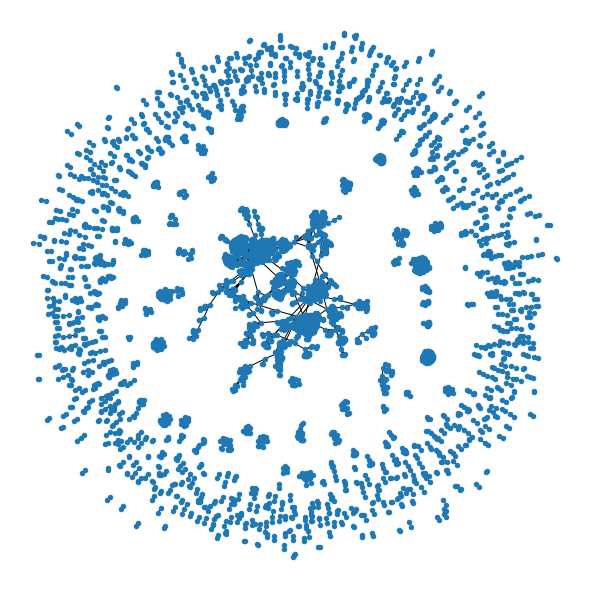

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw(graph, with_labels=False, node_size=20)
plt.show()